# Introduction to data
### Statistics with R
#### Duke University (Coursera)

Complete all **Exercises**, and submit answers to **Questions** on the
Coursera platform.

Some define statistics as the field that focuses on turning information
into knowledge. The first step in that process is to summarize and
describe the raw information - the data. In this lab we explore flights,
specifically a random sample of domestic flights that departed from the
three major New York City airport in 2013. We will generate simple
graphical and numerical summaries of data on these flights and explore
delay times. As this is a large data set, along the way you'll also
learn the indispensable skills of data processing and subsetting.

## Getting started

### Load packages

In this lab we will explore the data using the `dplyr` package and
visualize it using the `ggplot2` package for data visualization. The
data can be found in the companion package for this course, `statsr`.

Let's load the packages.

In [ ]:
library(statsr)
library(dplyr)
library(ggplot2)


### Data

The [Bureau of Transportation
Statistics](http://www.rita.dot.gov/bts/about/) (BTS) is a statistical
agency that is a part of the Research and Innovative Technology
Administration (RITA). As its name implies, BTS collects and makes
available transportation data, such as the flights data we will be
working with in this lab.

We begin by loading the `nycflights` data frame. Type the following in
your console to load the data:

In [3]:
data(nycflights)

The data frame containing `r nrow(nycflights)` flights that shows up in
your workspace is a *data matrix*, with each row representing an
*observation* and each column representing a *variable*. R calls this
data format a **data frame**, which is a term that will be used
throughout the labs.

To view the names of the variables, type the command


In [5]:
names(nycflights)

[1] "year"      "month"     "day"       "dep_time"  "dep_delay" "arr_time" 
 [7] "arr_delay" "carrier"   "tailnum"   "flight"    "origin"    "dest"     
[13] "air_time"  "distance"  "hour"      "minute"

This returns the names of the variables in this data frame. The
**codebook** (description of the variables) is included below. This
information can also be found in the help file for the data frame which
can be accessed by typing `?nycflights` in the console.

-   `year`, `month`, `day`: Date of departure
-   `dep_time`, `arr_time`: Departure and arrival times, local timezone.
-   `dep_delay`, `arr_delay`: Departure and arrival delays, in minutes.
    Negative times represent early departures/arrivals.
-   `carrier`: Two letter carrier abbreviation.
-   `9E`: Endeavor Air Inc.
-   `AA`: American Airlines Inc.
-   `AS`: Alaska Airlines Inc.
-   `B6`: JetBlue Airways
-   `DL`: Delta Air Lines Inc.
-   `EV`: ExpressJet Airlines Inc.
-   `F9`: Frontier Airlines Inc.
-   `FL`: AirTran Airways Corporation
-   `HA`: Hawaiian Airlines Inc.
-   `MQ`: Envoy Air
-   `OO`: SkyWest Airlines Inc.
-   `UA`: United Air Lines Inc.
-   `US`: US Airways Inc.
-   `VX`: Virgin America
-   `WN`: Southwest Airlines Co.
-   `YV`: Mesa Airlines Inc.
-   `tailnum`: Plane tail number
-   `flight`: Flight number
-   `origin`, `dest`: Airport codes for origin and destination. (Google
    can help you with what code stands for which airport.)
-   `air_time`: Amount of time spent in the air, in minutes.
-   `distance`: Distance flown, in miles.
-   `hour`, `minute`: Time of departure broken in to hour and minutes.

A very useful function for taking a quick peek at your data frame, and
viewing its dimensions and data types is `str`, which stands for
**str**ucture.


In [6]:
str(nycflights)

tibble [32,735 × 16] (S3: tbl_df/data.frame)
 $ year     : int [1:32735] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month    : int [1:32735] 6 5 12 5 7 1 12 8 9 4 ...
 $ day      : int [1:32735] 30 7 8 14 21 1 9 13 26 30 ...
 $ dep_time : int [1:32735] 940 1657 859 1841 1102 1817 1259 1920 725 1323 ...
 $ dep_delay: num [1:32735] 15 -3 -1 -4 -3 -3 14 85 -10 62 ...
 $ arr_time : int [1:32735] 1216 2104 1238 2122 1230 2008 1617 2032 1027 1549 ...
 $ arr_delay: num [1:32735] -4 10 11 -34 -8 3 22 71 -8 60 ...
 $ carrier  : chr [1:32735] "VX" "DL" "DL" "DL" ...
 $ tailnum  : chr [1:32735] "N626VA" "N3760C" "N712TW" "N914DL" ...
 $ flight   : int [1:32735] 407 329 422 2391 3652 353 1428 1407 2279 4162 ...
 $ origin   : chr [1:32735] "JFK" "JFK" "JFK" "JFK" ...
 $ dest     : chr [1:32735] "LAX" "SJU" "LAX" "TPA" ...
 $ air_time : num [1:32735] 313 216 376 135 50 138 240 48 148 110 ...
 $ distance : num [1:32735] 2475 1598 2475 1005 296 ...
 $ hour     : num [1:32735] 9 16 8 18 1

In [7]:
dim(nycflights)

[1] 32735    16

The `nycflights` data frame is a massive trove of information. Let's
think about some questions we might want to answer with these data:

-   We might want to find out how delayed flights headed to a particular
    destination tend to be.
-   We might want to evaluate how departure delays vary over months.
-   Or we might want to determine which of the three major NYC airports
    has a better on time percentage for departing flights.

### Seven verbs

The `dplyr` package offers seven verbs (functions) for basic data
manipulation:

-   `filter()`
-   `arrange()`
-   `select()`
-   `distinct()`
-   `mutate()`
-   `summarise()`
-   `sample_n()`

We will use some of these functions in this lab, and learn about others
in a future lab.

## Analysis

### Departure delays in flights to Raleigh-Durham (RDU)

We can examine the distribution of departure delays of all flights with
a histogram.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


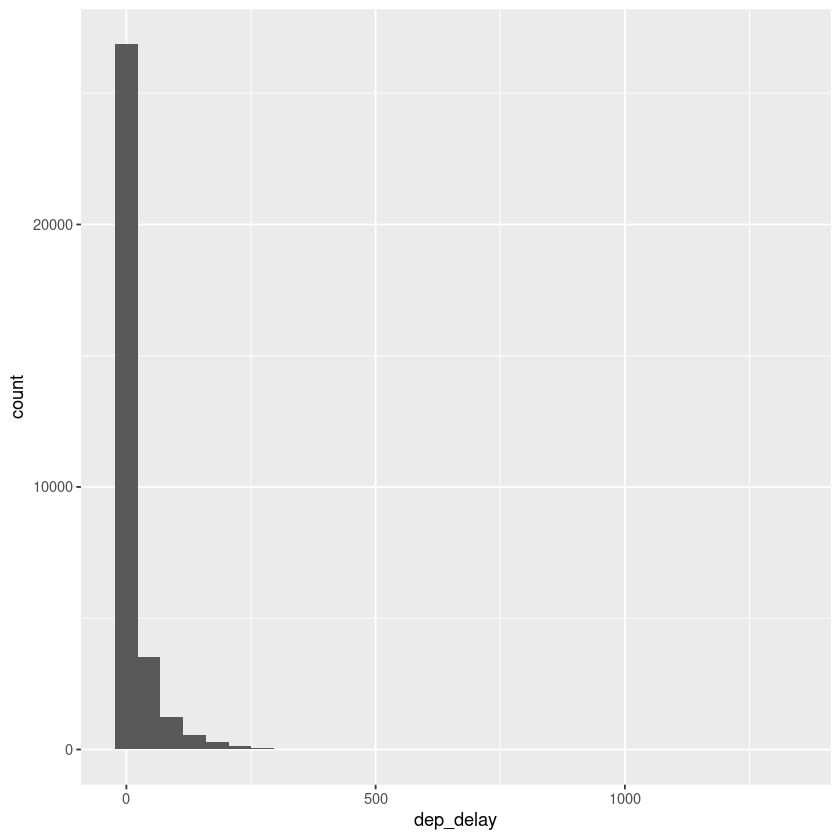

In [8]:
ggplot(data = nycflights, aes(x = dep_delay)) +
  geom_histogram()

This function says to plot the `dep_delay` variable from the
`nycflights` data frame on the x-axis. It also defines a `geom` (short
for geometric object), which describes the type of plot you will
produce.

Histograms are generally a very good way to see the shape of a single
distribution, but that shape can change depending on how the data is
split between the different bins. You can easily define the binwidth you
want to use:

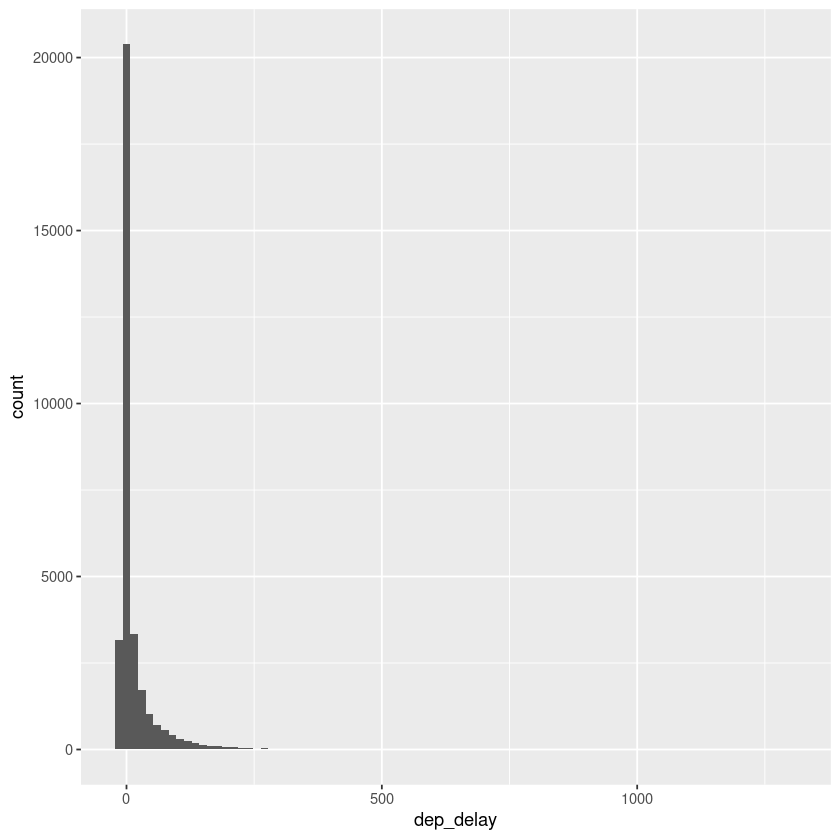

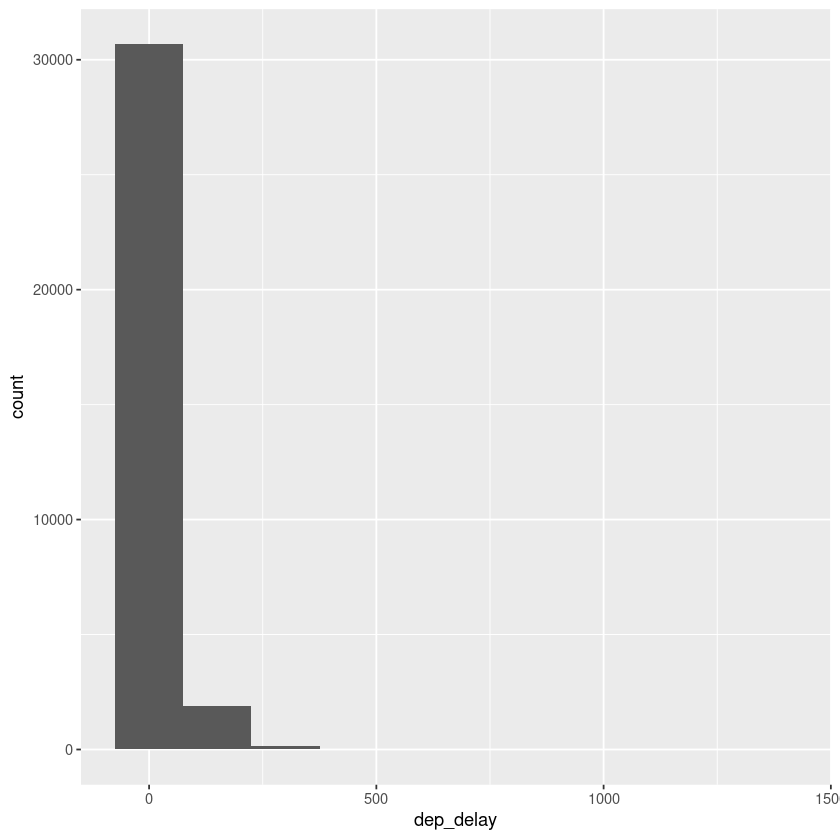

In [9]:
ggplot(data = nycflights, aes(x = dep_delay)) +
  geom_histogram(binwidth = 15)
ggplot(data = nycflights, aes(x = dep_delay)) +
  geom_histogram(binwidth = 150)

**Exercise**: How do these three histograms with the various binwidths
compare?

##### Narrow Bin Widths

-   **Detail**: Reveals more subtleties in the data distribution.
-   **Variability**: Highlights outliers and small-scale patterns.
-   **Noise**: May overemphasize random noise or minor fluctuations.
-   **Complexity**: Can be complex and harder to interpret, especially
    for large datasets.

##### Moderate Bin Widths

-   **Balance**: Offers a balanced view, preserving overall shape while
    smoothing out noise.
-   **Clarity**: Generally easier to interpret.
-   **General Trends**: Good for identifying major trends in the data.
-   **Suitability**: Often the best starting point for exploratory data
    analysis.

##### Wide Bin Widths

-   **Simplicity**: Simplifies the presentation, showing broad trends.
-   **Over-Smoothing**: Risks obscuring important details and nuances.
-   **Underlying Shape**: Useful for identifying basic distribution
    shapes (e.g., unimodal, bimodal).
-   **Large-scale Patterns**: Best for highlighting large-scale patterns
    and filtering out small fluctuations.

##### Conclusion

The choice of bin width in a histogram should be guided by the context
and purpose of the analysis. It's often beneficial to examine histograms
with multiple bin widths for a comprehensive understanding of the data.

If we want to focus on departure delays of flights headed to RDU only,
we need to first `filter` the data for flights headed to RDU
(`dest == "RDU"`) and then make a histogram of only departure delays of
only those flights.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


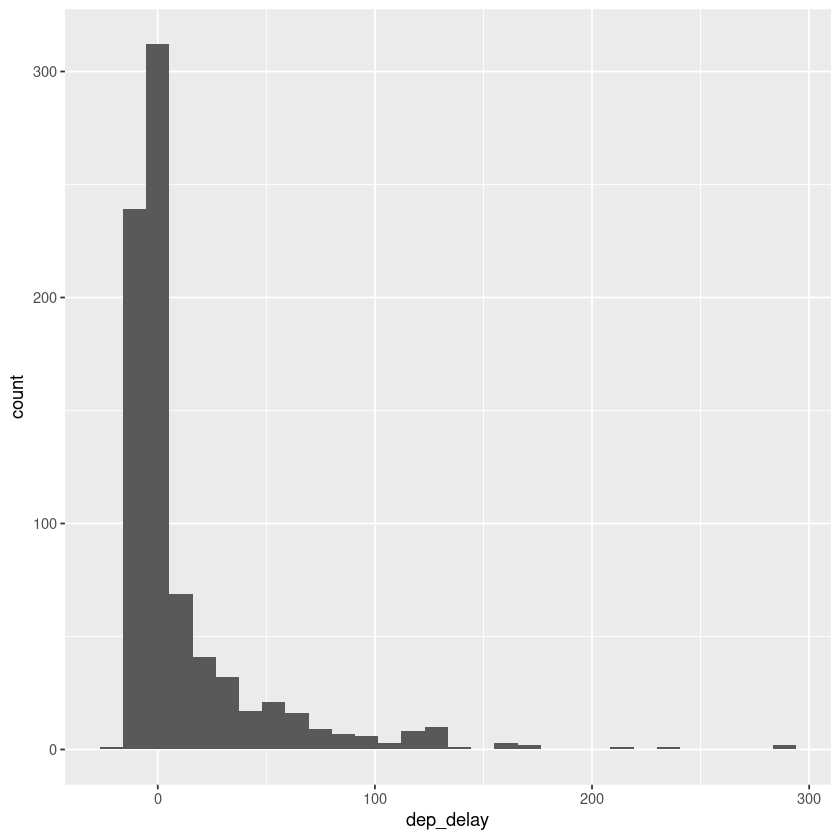

In [10]:
rdu_flights <- nycflights %>%
  filter(dest == "RDU")
ggplot(data = rdu_flights, aes(x = dep_delay)) +
  geom_histogram()

Let's decipher these three lines of code:

-   Line 1: Take the `nycflights` data frame, `filter` for flights
    headed to RDU, and save the result as a new data frame called
    `rdu_flights`.
-   `==` means "if it's equal to".
-   `RDU` is in quotation marks since it is a character string.
-   Line 2: Basically the same `ggplot` call from earlier for making a
    histogram, except that it uses the data frame for flights headed to
    RDU instead of all flights.

**Logical operators:** Filtering for certain observations (e.g. flights
from a particular airport) is often of interest in data frames where we
might want to examine observations with certain characteristics
separately from the rest of the data. To do so we use the `filter`
function and a series of **logical operators**. The most commonly used
logical operators for data analysis are as follows:

-   `==` means "equal to"
-   `!=` means "not equal to"
-   `>` or `<` means "greater than" or "less than"
-   `>=` or `<=` means "greater than or equal to" or "less than or equal
    to"

We can also obtain numerical summaries for these flights:

In [11]:
rdu_flights %>%
summarise(mean_dd = mean(dep_delay), sd_dd = sd(dep_delay), n = n())

mean_dd,sd_dd,n
<dbl>,<dbl>,<int>
11.69913,35.55567,801


Note that in the `summarise` function we created a list of two elements.
The names of these elements are user defined, like `mean_dd`, `sd_dd`,
`n`, and you could customize these names as you like (just don't use
spaces in your names). Calculating these summary statistics also require
that you know the function calls. Note that `n()` reports the sample
size.


**Summary statistics:** Some useful function calls for summary
statistics for a single numerical variable are as follows:

-   `mean`
-   `median`
-   `sd`
-   `var`
-   `IQR`
-   `range`
-   `min`
-   `max`


We can also filter based on multiple criteria. Suppose we are interested
in flights headed to San Francisco (SFO) in February:

Note that we can separate the conditions using commas if we want flights
that are both headed to SFO **and** in February. If we are interested in
either flights headed to SFO **or** in February we can use the `|`
instead of the comma.

1.  Create a new data frame that includes flights headed to SFO in
    February, and save this data frame as `sfo_feb_flights`. How many
    flights meet these criteria?

    <ol>

    <li style="color: green;">68</li>

    <li>1345</li>

    <li>2286</li>

    <li>3563</li>

    <li>32735</li>

    </ol>


In [14]:
sfo_feb_flights <- nycflights %>%
  filter(dest == "SFO", month == 2)
head(sfo_feb_flights, 5)

year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2013,2,18,1527,57,1903,48,DL,N711ZX,1322,JFK,SFO,358,2586,15,27
2013,2,3,613,14,1008,38,UA,N502UA,691,JFK,SFO,367,2586,6,13
2013,2,15,955,-5,1313,-28,DL,N717TW,1765,JFK,SFO,338,2586,9,55
2013,2,18,1928,15,2239,-6,UA,N24212,1214,EWR,SFO,353,2565,19,28
2013,2,24,1340,2,1644,-21,UA,N76269,1111,EWR,SFO,341,2565,13,40


In [15]:
dim(sfo_feb_flights)

[1] 68 16

2.  Make a histogram and calculate appropriate summary statistics for
    **arrival** delays of `sfo_feb_flights`. Which of the following is
    false?

    <ol>

    <li>The distribution is unimodal.</li>

    <li>The distribution is right skewed.</li>

    <li style="color: green;">No flight is delayed more than 2 hours.</li>

    <li>The distribution has several extreme values on the right
    side.</li>

    <li>More than 50% of flights arrive on time or earlier than
    scheduled.</li>

    </ol>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


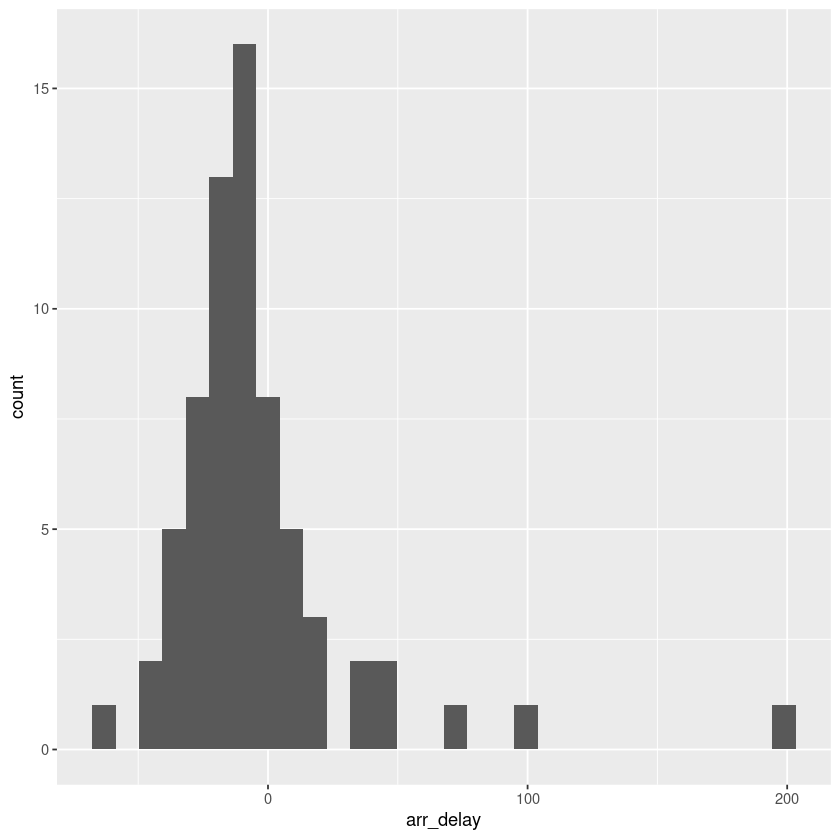

In [16]:
ggplot(data = sfo_feb_flights, aes(x = arr_delay)) +
  geom_histogram()

In [17]:
sfo_feb_flights %>%
summarise(mean_dd = mean(arr_delay), max = max(arr_delay), n = n())

mean_dd,max,n
<dbl>,<dbl>,<int>
-4.5,196,68


Another useful functionality is being able to quickly calculate summary
statistics for various groups in your data frame. For example, we can
modify the above command using the `group_by` function to get the same
summary stats for each origin airport:

In [18]:
rdu_flights %>%
  group_by(origin) %>%
  summarise(mean_dd = mean(dep_delay), sd_dd = sd(dep_delay), n = n())

origin,mean_dd,sd_dd,n
<chr>,<dbl>,<dbl>,<int>
EWR,13.365517,32.08492,145
JFK,15.396667,40.30535,300
LGA,7.904494,32.18620,356


Here, we first grouped the data by `origin`, and then calculated the
summary statistics.

3.  Calculate the median and interquartile range for `arr_delay`s of
    flights in the `sfo_feb_flights` data frame, grouped by carrier.
    Which carrier has the highest IQR of arrival delays?

    <ol>

    <li>American Airlines</li>

    <li>JetBlue Airways</li>

    <li>Virgin America</li>

    <li style="color: green;">Delta and United Airlines</li>

    <li>Frontier Airlines</li>

    </ol>

In [19]:
sfo_feb_flights %>%
  group_by(carrier) %>%
  summarise(median = median(arr_delay), IQR = IQR(arr_delay), n = n())

carrier,median,IQR,n
<chr>,<dbl>,<dbl>,<int>
AA,5.0,17.50,10
B6,-10.5,12.25,6
DL,-15.0,22.00,19
UA,-10.0,22.00,21
VX,-22.5,21.25,12


### Departure delays over months

Which month would you expect to have the highest average delay departing
from an NYC airport?

Let's think about how we would answer this question:

-   First, calculate monthly averages for departure delays. With the new
    language we are learning, we need to `group_by` months, then
    `summarise` mean departure delays.
-   Then, we need to `arrange` these average delays in `desc`ending
    order


In [21]:
nycflights %>%
  group_by(month) %>%
  summarise(mean_dd = mean(dep_delay), median_dd = median(dep_delay)) %>%
  arrange(desc(mean_dd))

month,mean_dd,median_dd
<int>,<dbl>,<dbl>
7,20.754559,0
6,20.350293,0
12,17.368189,1
4,14.554477,-2
3,13.517602,-1
5,13.264800,-1
8,12.619097,-1
2,10.687227,-2
1,10.233333,-2


4.  Which month has the highest average departure delay from an NYC
    airport?

    <ol>

    <li>January</li>

    <li>March</li>

    <li style="color: green;">July</li>

    <li>October</li>

    <li>December</li>

    </ol>

5.  Which month has the highest median departure delay from an NYC
    airport?

    <ol>

    <li>January</li>

    <li>March</li>

    <li>July</li>

    <li>October</li>

    <li style="color: green;">December</li>

    </ol>

6.  Is the mean or the median a more reliable measure for deciding which
    month(s) to avoid flying if you really dislike delayed flights, and
    why?

    <ol>

    <li>Mean would be more reliable as it gives us the true
    average.</li>

    <li>Mean would be more reliable as the distribution of delays is
    symmetric.</li>

    <li style="color: green;">Median would be more reliable as the distribution of delays is
    skewed.</li>

    <li>Median would be more reliable as the distribution of delays is
    symmetric.</li>

    <li>Both give us useful information.</li>

    </ol>

We can also visualize the distributions of departure delays across
months using side-by-side box plots:

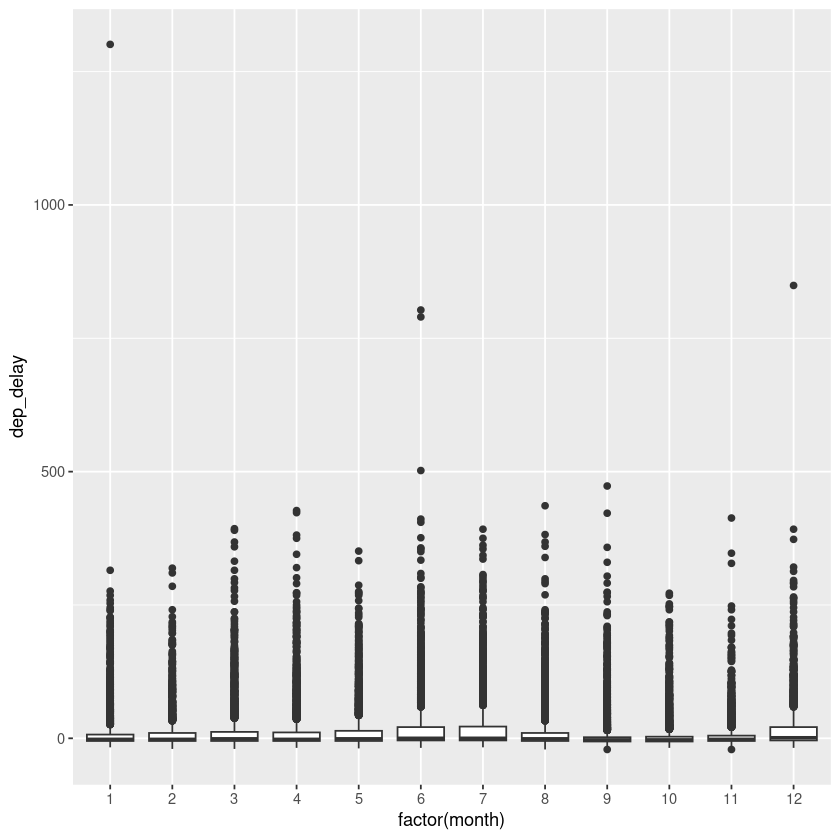

In [22]:
ggplot(nycflights, aes(x = factor(month), y = dep_delay)) +
    geom_boxplot()

There is some new syntax here: We want departure delays on the y-axis
and the months on the x-axis to produce side-by-side box plots.
Side-by-side box plots require a categorical variable on the x-axis,
however in the data frame `month` is stored as a numerical variable
(numbers 1 - 12). Therefore we can force R to treat this variable as
categorical, what R calls a **factor**, variable with `factor(month)`.

### On time departure rate for NYC airports

Suppose you will be flying out of NYC and want to know which of the
three major NYC airports has the best on time departure rate of
departing flights. Suppose also that for you a flight that is delayed
for less than 5 minutes is basically "on time". You consider any flight
delayed for 5 minutes of more to be "delayed".

In order to determine which airport has the best on time departure rate,
we need to - first classify each flight as "on time" or "delayed", -
then group flights by origin airport, - then calculate on time departure
rates for each origin airport, - and finally arrange the airports in
descending order for on time departure percentage.

Let's start with classifying each flight as "on time" or "delayed" by
creating a new variable with the `mutate` function.

In [24]:
nycflights <- nycflights %>%
  mutate(dep_type = ifelse(dep_delay < 5, "on time", "delayed"))
head(nycflights, 5)

year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,dep_type
<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40,delayed
2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57,on time
2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59,on time
2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41,on time
2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2,on time


The first argument in the `mutate` function is the name of the new
variable we want to create, in this case `dep_type`. Then if
`dep_delay < 5` we classify the flight as `"on time"` and `"delayed"` if
not, i.e. if the flight is delayed for 5 or more minutes.

Note that we are also overwriting the `nycflights` data frame with the
new version of this data frame that includes the new `dep_type`
variable.

We can handle all the remaining steps in one code chunk:

In [25]:
nycflights %>%
  group_by(origin) %>%
  summarise(ot_dep_rate = sum(dep_type == "on time") / n()) 

origin,ot_dep_rate
<chr>,<dbl>
EWR,0.6369892
JFK,0.6935854
LGA,0.7279229


**The summarise step is telling R to count up how many records of the
currently found group are on time - `sum(dep_type == "on_time")` - and
divide that result by the total number of elements in the currently
found group - n() - to get a proportion, then to store the answer in a
new variable called `ot_dep_rate`.**

7.  If you were selecting an airport simply based on on time departure
    percentage, which NYC airport would you choose to fly out of?

    <ol>

    <li>EWR</li>

    <li>JFK</li>

    <li style="color: green;">LGA</li>

    </ol>

We can also visualize the distribution of on on time departure rate
across the three airports using a segmented bar plot.

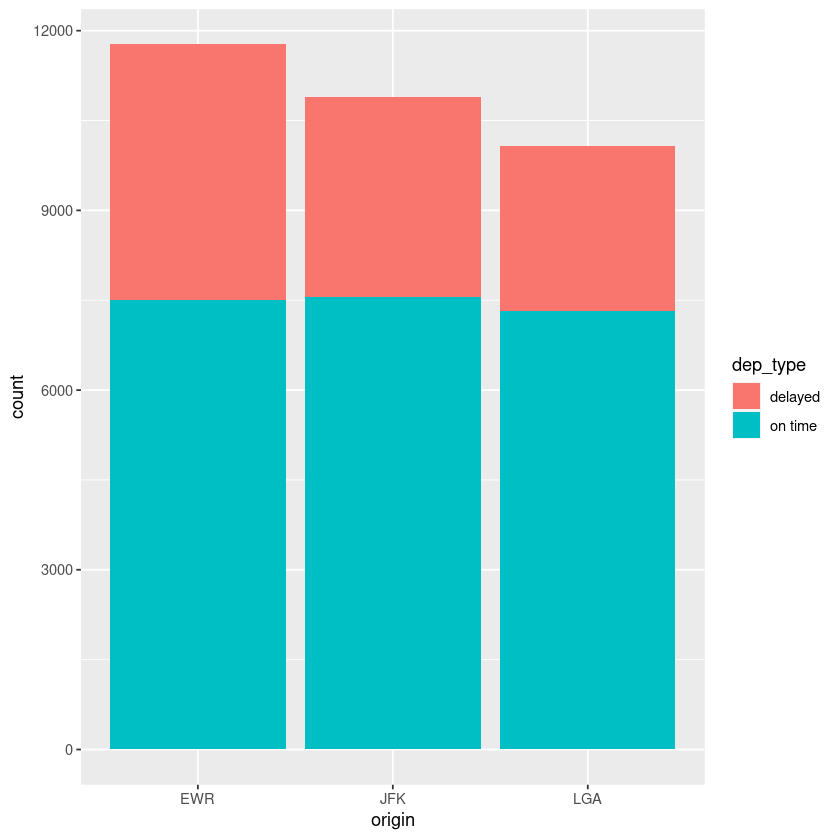

In [26]:
ggplot(data = nycflights, aes(x = origin, fill = dep_type)) +
  geom_bar()

8.  Mutate the data frame so that it includes a new variable that
    contains the average speed, `avg_speed` traveled by the plane for
    each flight (in mph). What is the tail number of the plane with the
    fastest `avg_speed`? **Hint:** Average speed can be calculated as
    distance divided by number of hours of travel, and note that
    `air_time` is given in minutes. If you just want to show the
    `avg_speed` and `tailnum` and none of the other variables, use the
    select function at the end of your pipe to select just these two
    variables with `select(avg_speed, tailnum)`. You can Google this
    tail number to find out more about the aircraft.

    <ol>

    <li style="color: green;">N666DN</li>

    <li>N755US</li>

    <li>N779JB</li>

    <li>N947UW</li>

    <li>N959UW</li>

    </ol>

In [27]:
nycflights <- nycflights %>%
  mutate(avg_speed = distance / air_time * 60)
nycflights %>%
select(avg_speed, tailnum)%>%
  arrange(desc(avg_speed))%>%
  head(5)  

avg_speed,tailnum
<dbl>,<chr>
703.3846,N666DN
557.4419,N779JB
554.2197,N571JB
547.8857,N568JB
547.8857,N5EHAA


9.  Make a scatterplot of `avg_speed` vs. `distance`. Which of the
    following is true about the relationship between average speed and
    distance.

    <ol>

    <li>As distance increases the average speed of flights
    decreases.</li>

    <li>The relationship is linear.</li>

    <li style="color: green;">There is an overall postive association between distance and average
    speed.</li>

    <li>There are no outliers.</li>

    <li>The distribution of distances are uniform over 0 to 5000
    miles.</li>

    </ol>

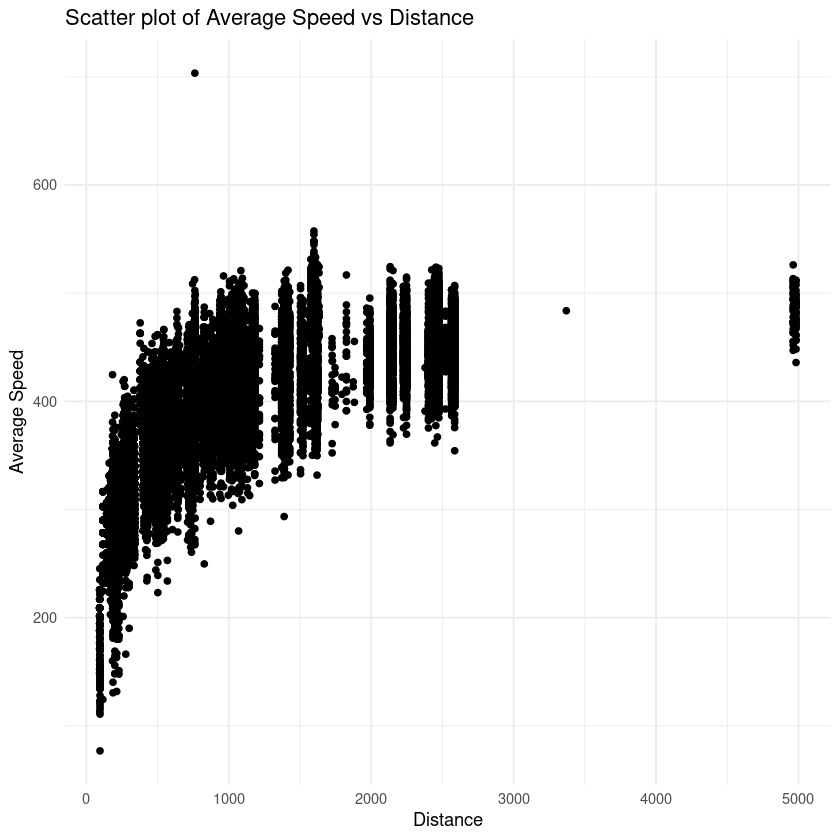

In [28]:
ggplot(nycflights, aes(x = distance, y = avg_speed)) +
  geom_point() +  # Add points
  labs(x = "Distance", y = "Average Speed", title = "Scatter plot of Average Speed vs Distance") +
  theme_minimal()

10. Suppose you define a flight to be "on time" if it gets to the
    destination on time or earlier than expected, regardless of any
    departure delays. Mutate the data frame to create a new variable
    called `arr_type` with levels `"on time"` and `"delayed"` based on
    this definition. Then, determine the on time arrival percentage
    based on whether the flight departed on time or not. What proportion
    of flights that were `"delayed"` departing arrive `"on time"`?
    [NUMERIC INPUT]

In [29]:
nycflights <- nycflights %>%
  mutate(arr_type = ifelse(arr_delay <= 0, "on time", "delayed")) 

In [30]:
nycflights %>% group_by(dep_type)%>%
 summarise(ot_arr_rate=sum(arr_type=="on time")/n())

dep_type,ot_arr_rate
<chr>,<dbl>
delayed,0.1833639
on time,0.7762241
